<a href="https://colab.research.google.com/github/remjw/data/blob/master/notebook/dict2df_catplot_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Type Conversion between Built-in and External Types

## Dependencies:

For Non-Colab environments, run `pip install pandas seaborn` to install required packages pandas and seaborn.

## Type Conversion:

- Type conversion for matching required argument format in library calls (sending a request to a programming library for executing a specific function in the library).
- Python's `Dict` to `Pandas.Dataframe`

## Example: Grouped Barchart by Seaborn

## Call carplot with built-in Pandas.dataframe data

<class 'pandas.core.frame.DataFrame'>
344
species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object


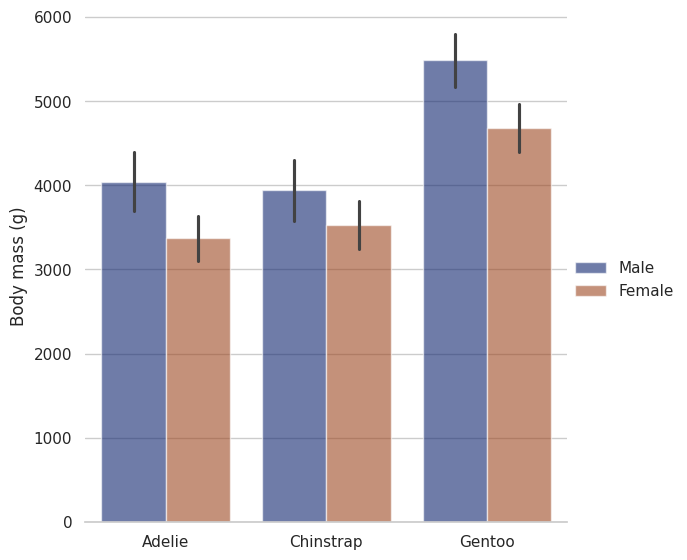

In [ ]:
# Cell 1

'''Call Seaborn.carplot with built-in Pandas.dataframe data penguins
barplot mean values of body_mass_g, groupby species and subgroupby sex
'''

import seaborn as sns
sns.set_theme(style="whitegrid")

# 1. Loading built-in penguins data
penguins = sns.load_dataset("penguins")

# 2. view structure, values of 1st row 0-based indexing
print(type(penguins)); print(len(penguins)); print(penguins.iloc[0])

# 3. Draw a nested barplot of body_mass_g by species and sex
g = sns.catplot(
    data=penguins
    , kind="bar"
    , x="species" # group: groupby species
    , y="body_mass_g" # mean value of body_mass_g
    , hue="sex"   # subgroup: groupby sex within each species
    , errorbar="sd"
    , palette="dark"
    , alpha=.6
    , height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

## Carplot on Python's Dict

type conversion (data engineering)
- transform data to Pandas.dataframe (pd.df)
- read rows by integer indexes

In [ ]:
# Cell 2 - convert Dict to pd.df

# Read the output of cell:
#   Each key become (property/attribute) column name in the dataframe;
#   The paired value set become the corresponding values in the column.
#   pandas assigns each row an index auto-generated from an increasing integer sequence

import pandas as pd

data = {'cat' : ['book', 'book', 'grocery', 'entertainment', 'grocery']
        , 'total' : [90, 21, 6, 16, 50]
        , 'month' : ['January', 'January', 'March', 'May', 'February']
      }

'''watch out how pandas distributes Dict keys and values in dataframe structure
             cat  total    month
0           book     90  January
1           book     21  Jaunary
2        grocery      6    March
3  entertainment     16      May
'''

# Convert
purchase = pd.DataFrame(data)

print("Original DataFrame"); print(purchase)

print("Value of row 1") # Use auto-gen index to read a row
print(purchase.iloc[1]) # index 1 for 2nd row

# (Colab: substitute display for print; play with the options in Next Steps, brought to you by Colab AI)

Original DataFrame
             cat  total     month
0           book     90   January
1           book     21   January
2        grocery      6     March
3  entertainment     16       May
4        grocery     50  February
Value of row 1
cat         book
total         21
month    January
Name: 1, dtype: object


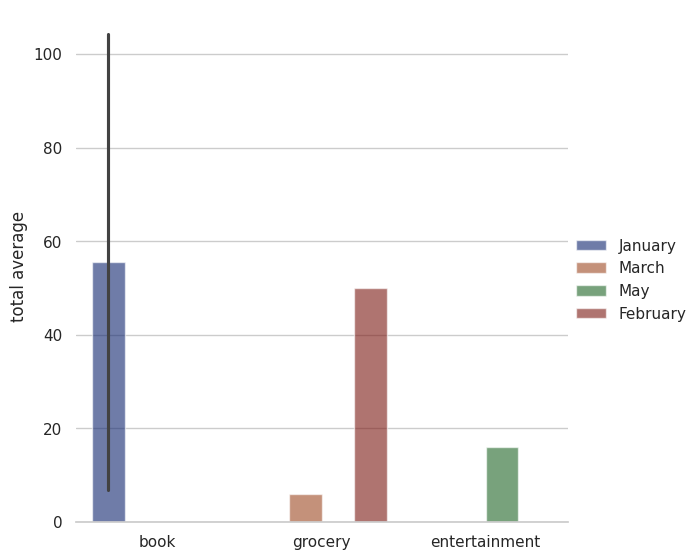

In [ ]:
# Cell 3 - catplot 'total' groupby column 'cat' subgroup-by 'month'
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=purchase
    , kind="bar"
    , x="cat"
    , y="total"
    , hue="month"
    , errorbar="sd"  # level of variation month by month
    , palette="dark"
    , alpha=.6
    , height=6
)
g.despine(left=True)
g.set_axis_labels("", "total average")
g.legend.set_title("")